# Bar Plot (comparison plots)

Every bar length encodes the value. There are two variants of bar charts `vertical bar charts` and `horizontal bar charts`. Bar charts used to compare numerical values across categories, vertical bar charts are sometimes used to show a single variable over time.


## Don'ts of Bar Charts

+ Don't confuse vertical bar charts with histograms. Bar charts compare different variables or categories, while histograms show the distribution for a single variable. Histograms will be discussed later in this chapter.

+ Another common mistake is to use bar charts to show central tendencies among groups or categories. Use box plots or violin plots to show statistical measures or distributions in these cases.

## Design Practices
+ The axis corresponding to the numerical variable should start at zero. Starting with another value might be misleading, as it makes a small value difference look like a big one.

+ Use horizontal labels—that is, as long as the number of bars is small, and the chart doesn't look too cluttered.

+ The labels can be rotated to different angles if there isn't enough space to present them horizontally. You can see this on the labels of the x-axis of the preceding diagram.

In [125]:
import numpy as np
import pandas as pd
import os
import time

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
# Const ...

# TODO ... 
ROOT_DIR = 'C:\Salem\WorkSpace\Python\matplotlib'
PATH_TO_DATA = os.path.join(ROOT_DIR, 'assets', 'data', 'the-data-visualization-workshop')

In [126]:
# Load dataset
movie_scores = pd.read_csv(os.path.join(PATH_TO_DATA, 'movie_scores.csv'))


bills = sns.load_dataset('tips')

In [113]:
movie_scores.head(2)

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79


In [123]:
categories = ['a', 'b', 'c', 'd']
# pos = np.array([1, 2, 3, 4])
pos = np.arange(len(categories))

values_1 = np.array([3, 4, 5, 2])
values_2 = np.array([4, 2, 3, 7])

width = 0.3

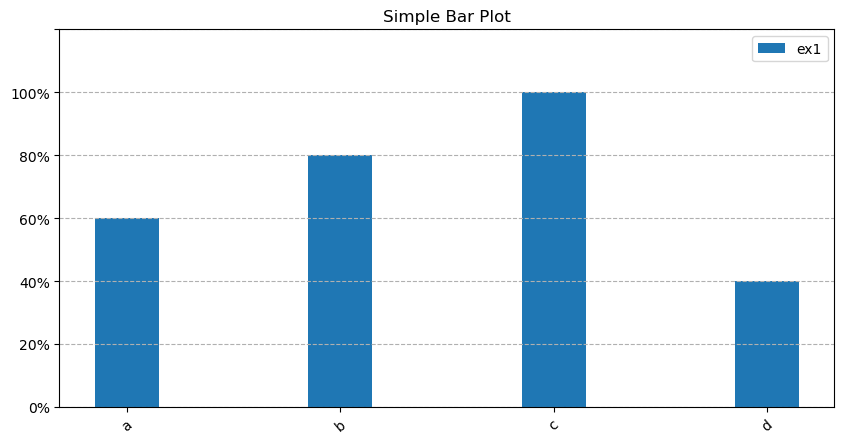

In [122]:
# ...
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(pos, values_1, width=width, label='ex1')

# ...
plt.xticks(pos, rotation=40)
plt.yticks(np.arange(0, 7, 1))

# ...
ax = plt.gca()
ax.set_xticklabels(categories)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# ...
# ax.set_yticks(np.arange(0, 100, 10), minor=True) # ??
# ax.yaxis.grid(which='major') # ??
ax.yaxis.grid(which='major', linestyle='--')

# ...
plt.title('Simple Bar Plot')
plt.legend()
plt.show();

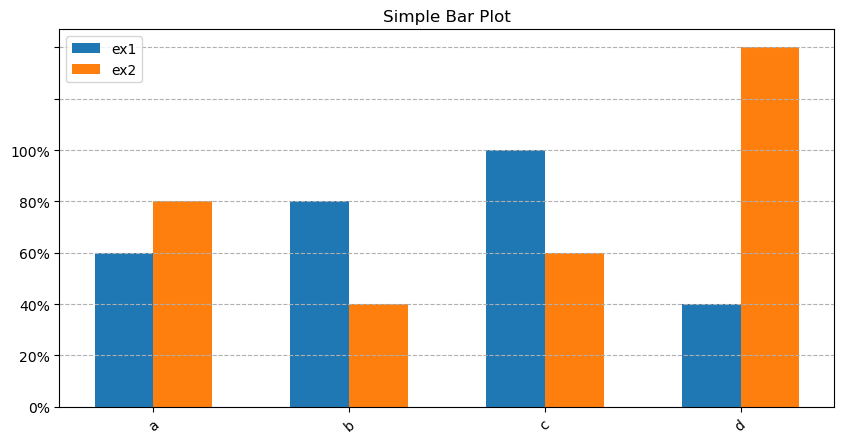

In [96]:
# ...
plt.figure(figsize=(10, 5), dpi=100)
plt.bar(pos - width / 2, values_1, width=width, label='ex1')
plt.bar(pos + width / 2, values_2, width=width, label='ex2')

# ...
plt.xticks(pos, rotation=40)
plt.yticks(np.arange(0, 8, 1))

# ...
ax = plt.gca()
ax.set_xticklabels(categories)
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])

# ...
# ax.set_yticks(np.arange(0, 100, 10), minor=True) # ??
# ax.yaxis.grid(which='major') # ??
ax.yaxis.grid(which='major', linestyle='--')

# ...
plt.title('Simple Bar Plot')
plt.legend()
plt.show();

Check how to make 100% fit the heighest bar !!!

In [117]:
movie_scores.head(2)

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79


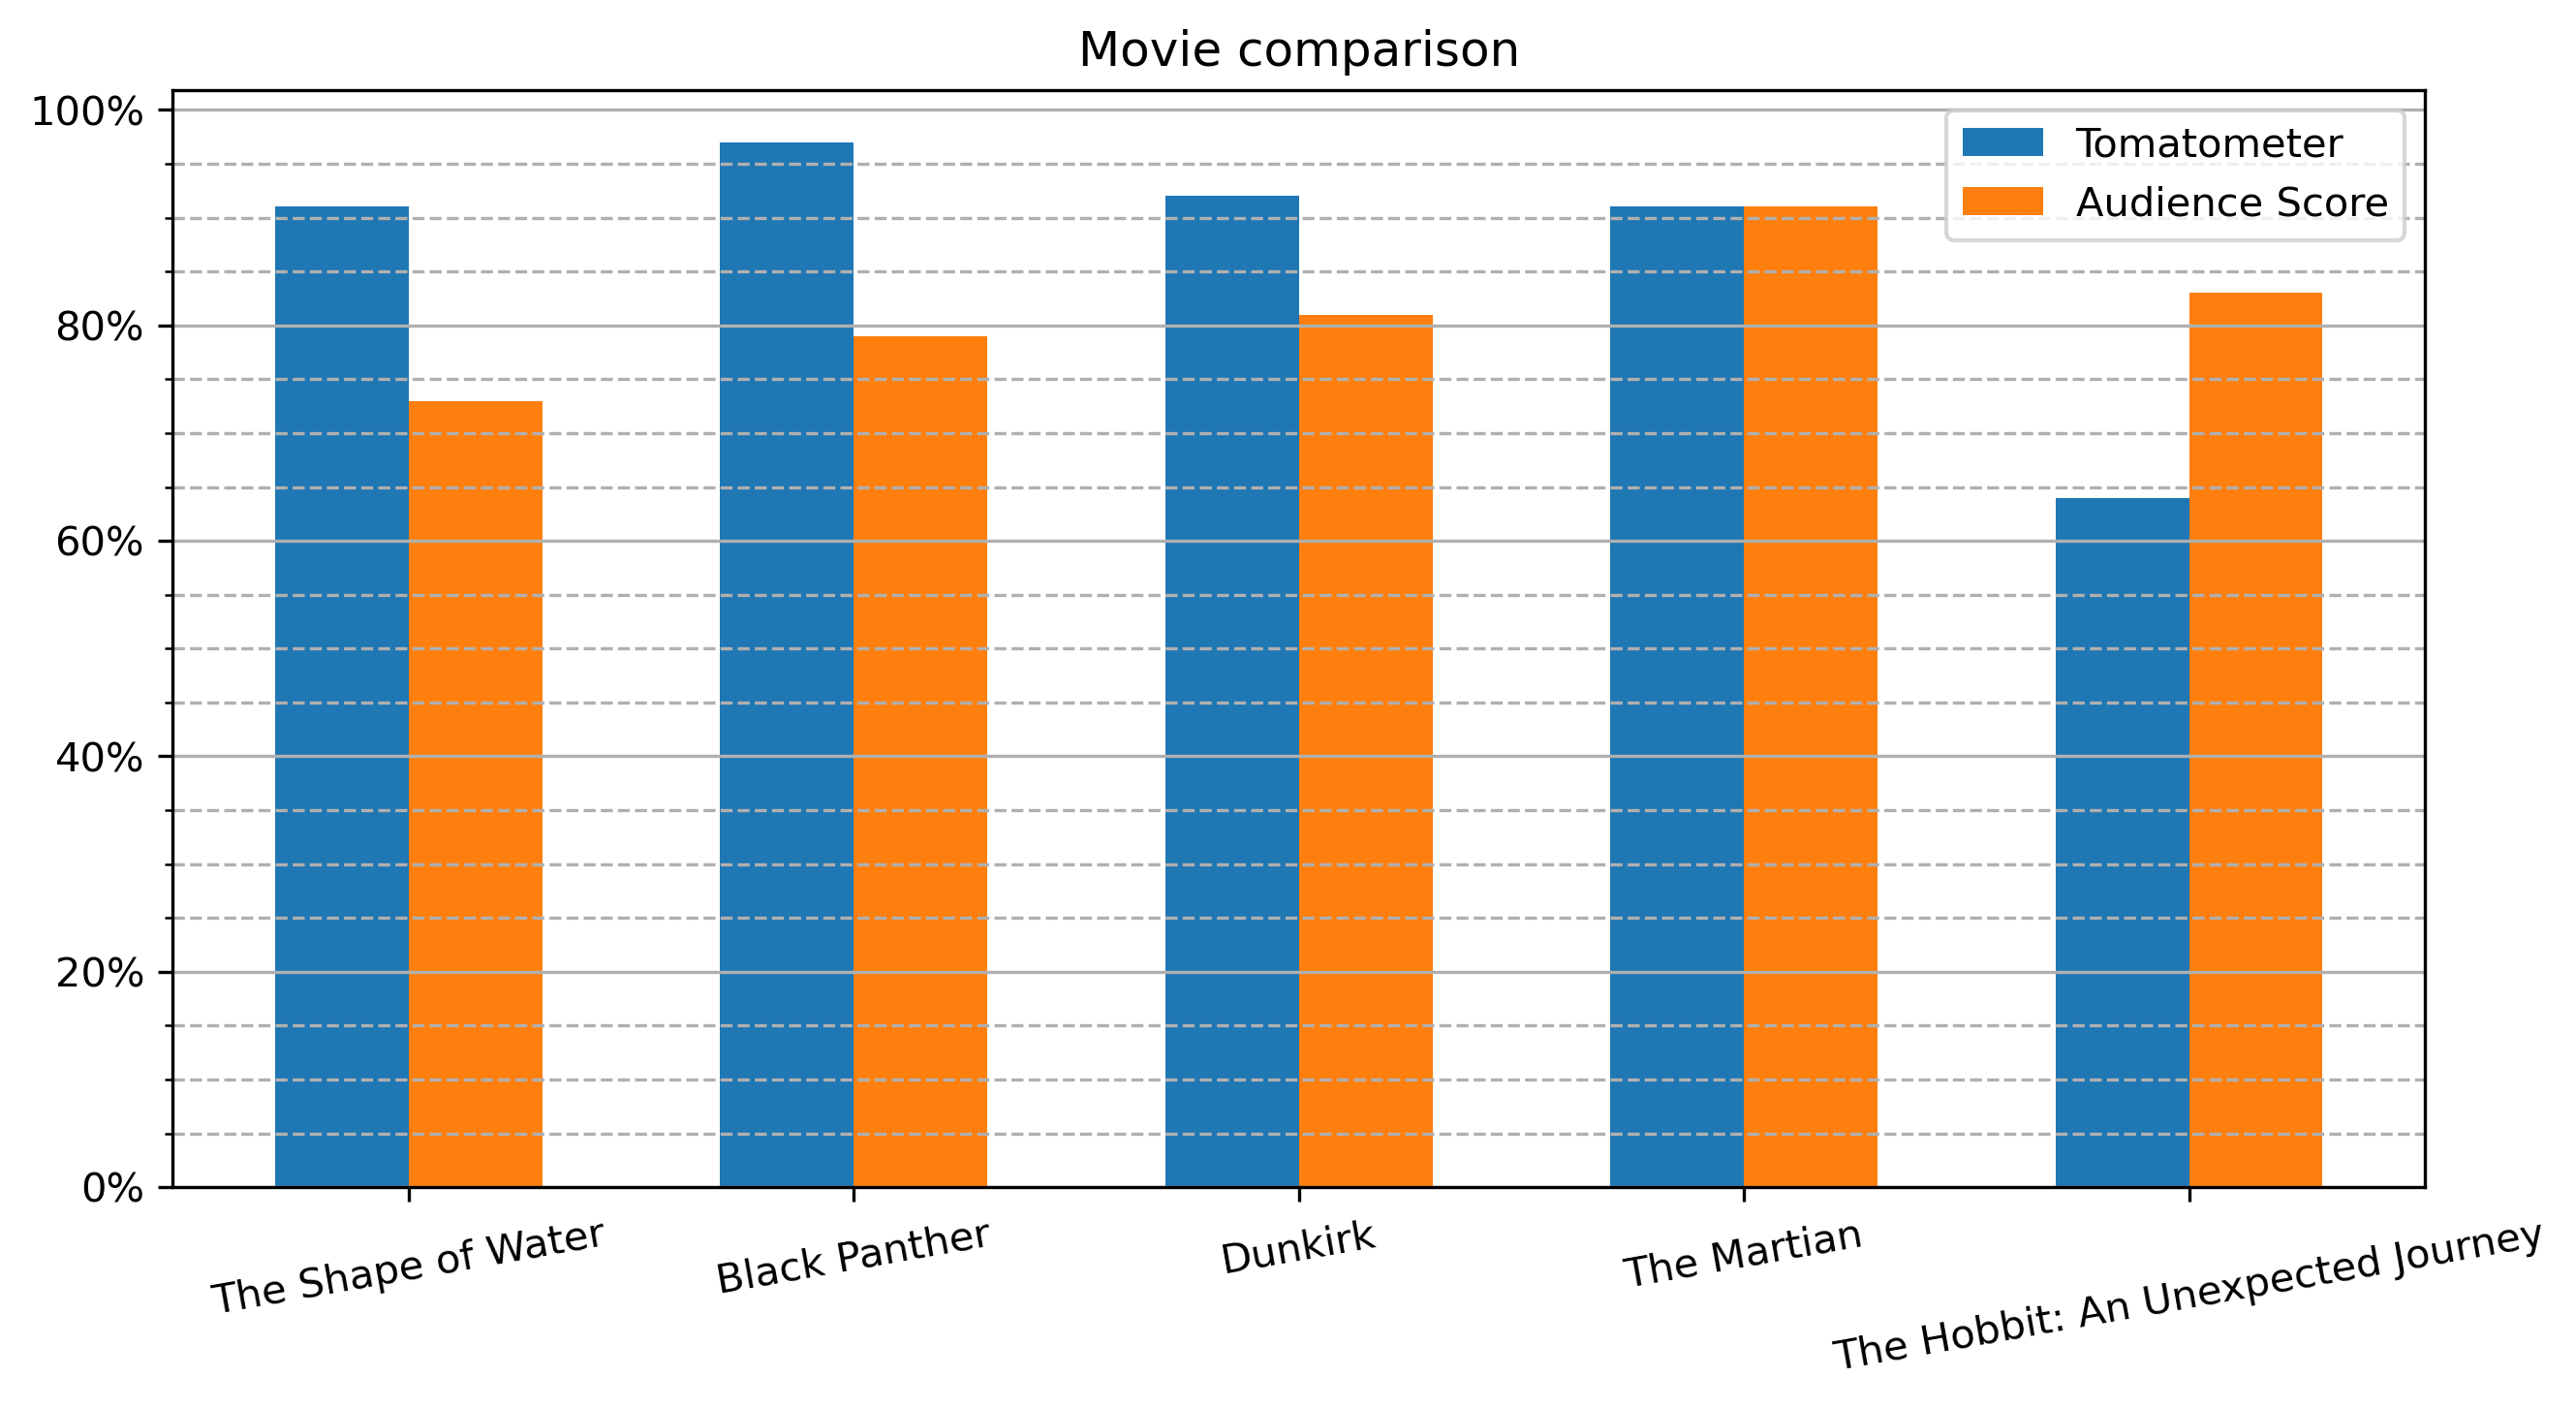

In [132]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create bar plot
pos = np.arange(len(movie_scores['MovieTitle']))
width = 0.3
plt.bar(pos - width / 2, movie_scores['Tomatometer'], width, label='Tomatometer')
plt.bar(pos + width / 2, movie_scores['AudienceScore'], width, label='Audience Score')
# Specify ticks
plt.xticks(pos, rotation=10)
plt.yticks(np.arange(0, 101, 20))
# Get current Axes for setting tick labels and horizontal grid
ax = plt.gca()
# Set tick labels
ax.set_xticklabels(movie_scores['MovieTitle'])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
# Add minor ticks for y-axis in the interval of 5
ax.set_yticks(np.arange(0, 100, 5), minor=True)
# Add major horizontal grid with solid lines
ax.yaxis.grid(which='major')
# Add minor horizontal grid with dashed lines
ax.yaxis.grid(which='minor', linestyle='--')
# Add title
plt.title('Movie comparison')
# Add legend
plt.legend()
# Show plot
plt.show()

In [128]:
bills.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [151]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_range = np.arange(len(days))
smoker = ['Yes', 'No']

In [133]:
bills[bills['day'] == 'Sun'].head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [148]:
bills_by_days = [bills[bills['day'] == day] for day in days]

In [155]:
bills_by_days_smoker = [[bills_by_days[day][bills_by_days[day]['smoker'] == s] for s in smoker] for day in days_range]
len(bills_by_days_smoker)

4

In [163]:
len(bills_by_days_smoker[0])

2

In [167]:
bills_by_days_smoker[0][0].head(2)

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.0,Male,Yes,Thur,Lunch,2
83,32.68,5.0,Male,Yes,Thur,Lunch,2


In [168]:
total_by_days_smoker = [[bills_by_days_smoker[day][s]['total_bill'].sum() for s in range(len(smoker))] for day in days_range]

In [170]:
totals = np.asarray(total_by_days_smoker)
totals.shape

(4, 2)

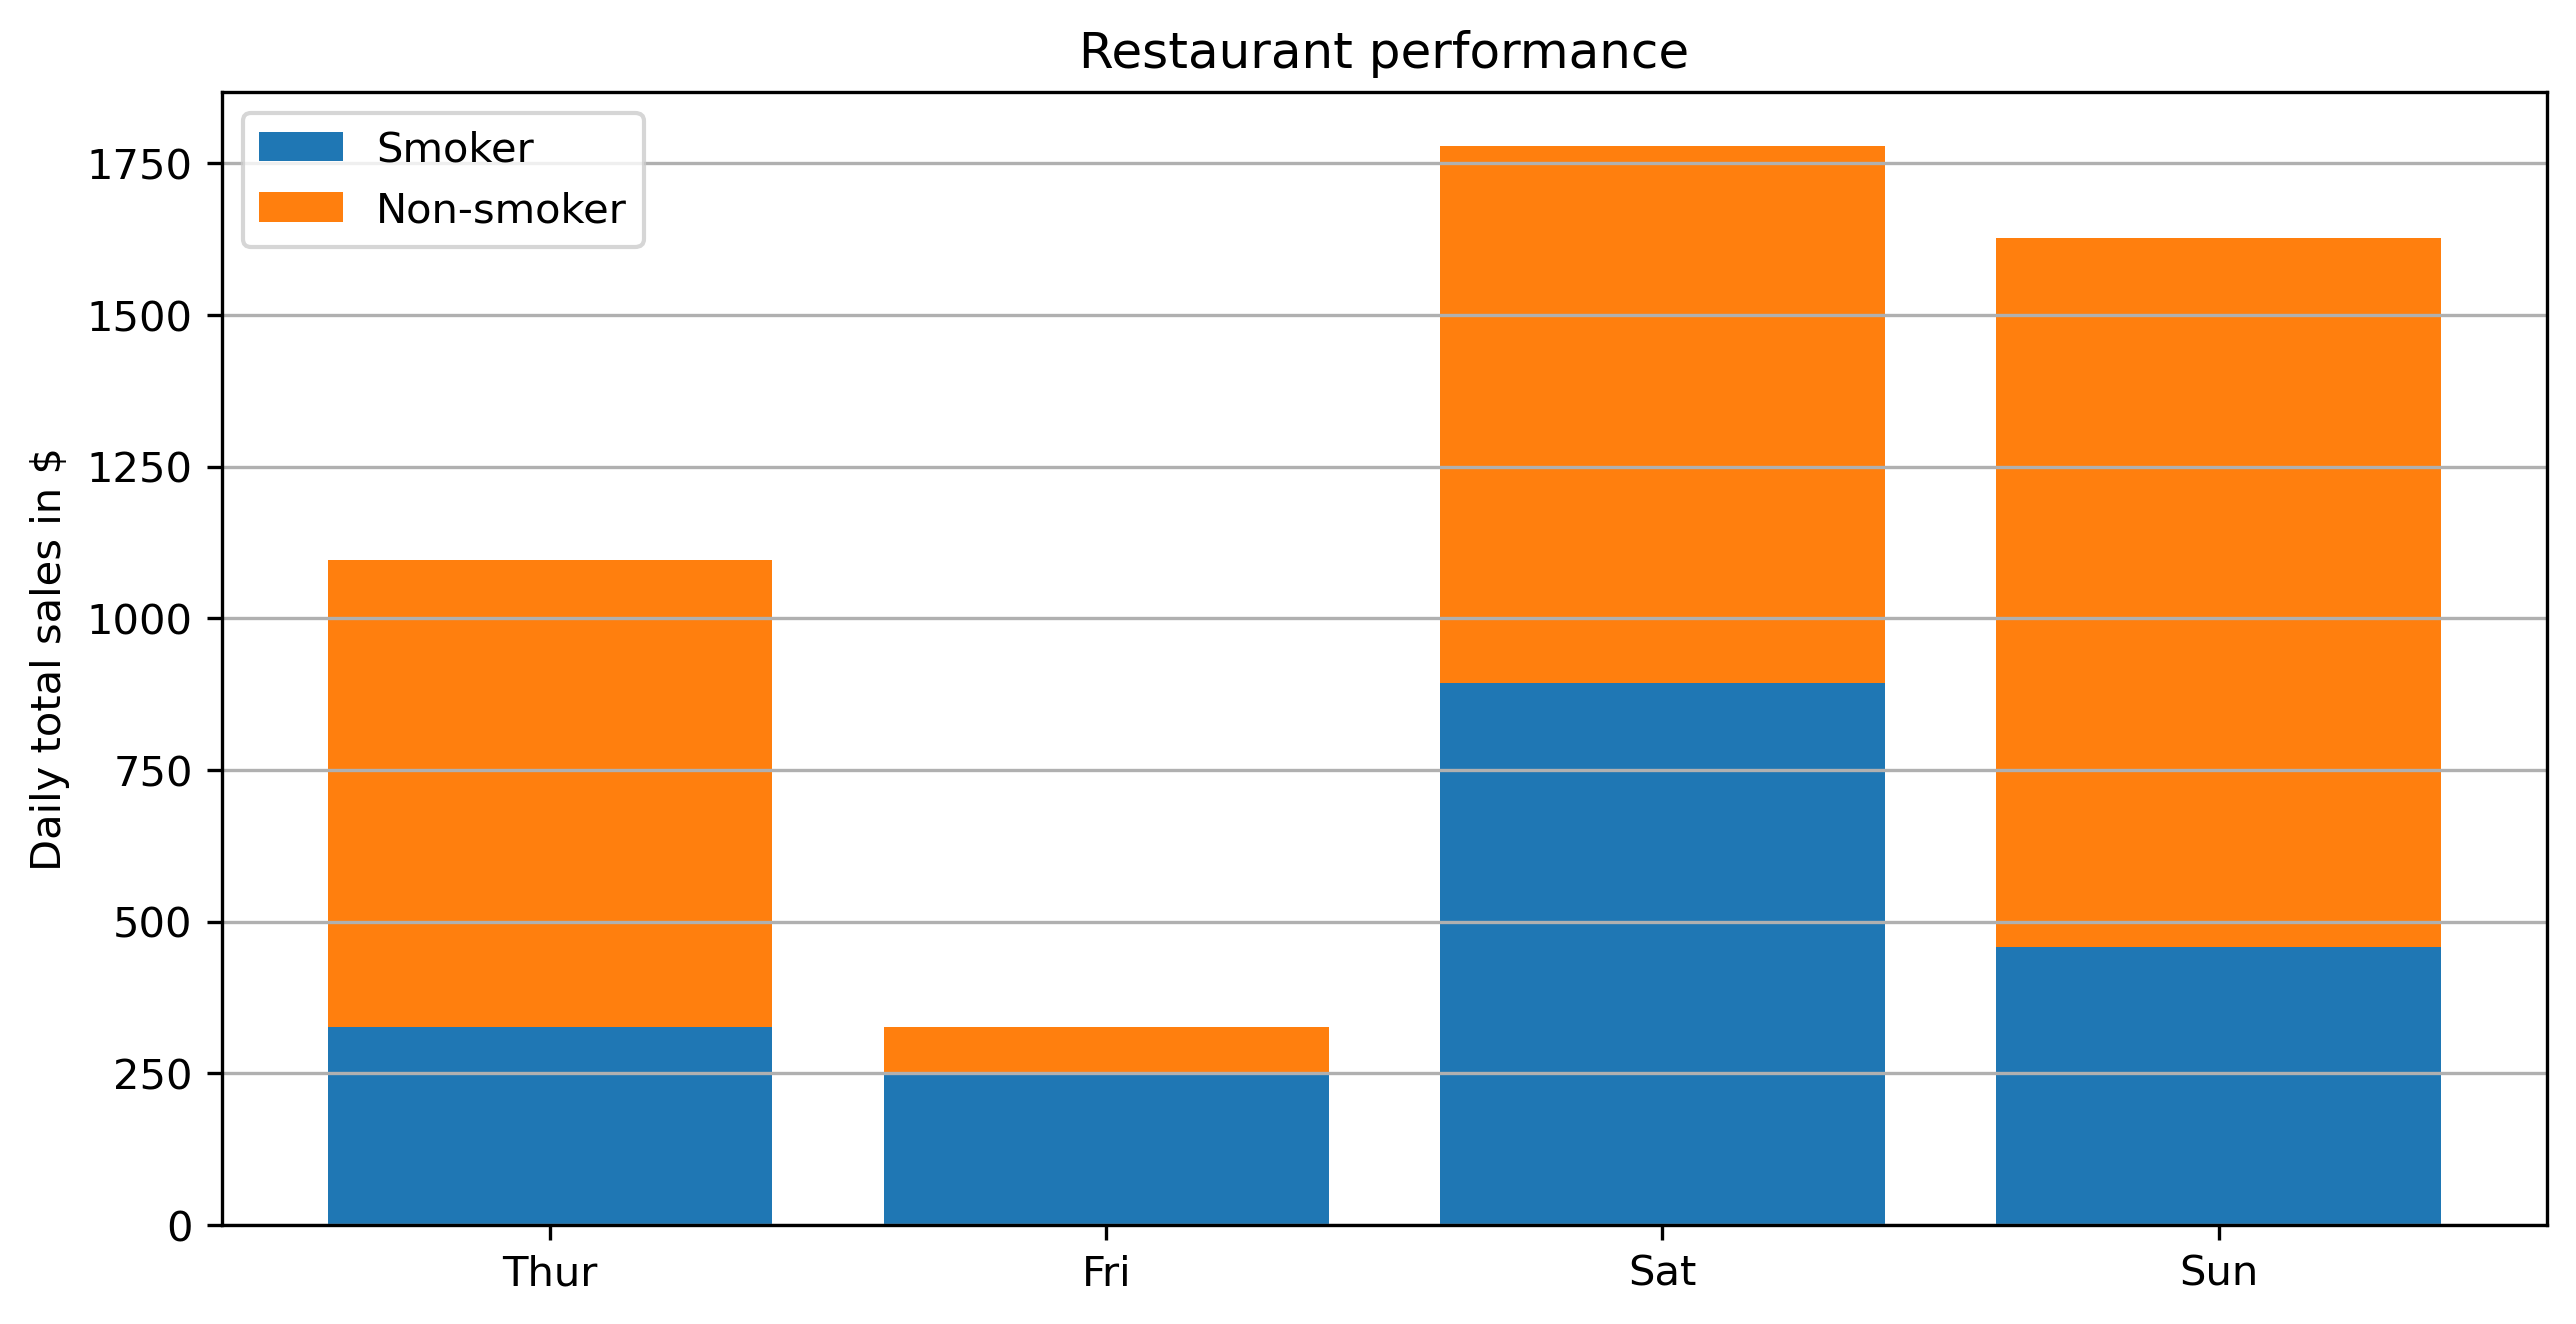

In [174]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create stacked bar plot
plt.bar(days_range, totals[:, 0], label='Smoker')
plt.bar(days_range, totals[:, 1], bottom=totals[:, 0], label='Non-smoker')
# Add legend
plt.legend()
# Add labels and title
plt.xticks(days_range)
ax = plt.gca()
ax.set_xticklabels(days)
ax.yaxis.grid()
plt.ylabel('Daily total sales in $')
plt.title('Restaurant performance')
# Show plot
plt.show()